# Introducción

El algoritmo COMPASS tiene como objetivo predecir el grado de posibilidad de reincidencia de un criminal, para ello ha sido entrenado con datos pertenecientes a una gran variedad de delincuentes. Debido a la diversidad de características demográficas y personales de los sujetos de estudios, en ocasiones pueden aparecer patrones que influencian al algoritmo a emitir predicciones sesgadas en base a estos rasgos.

En esta práctica se estudiará un dataframe con información de criminales pertenecientes a distintas razas, géneros y categorías de edad, el objetivo es evaluar la influencia de estos factores en la predicción de riesgo emitida por el algoritmo, comparándola con el valor de reincidencia real medido dos años después de cometer el delito original.

# Preparación del Entorno de Trabajo

En primer lugar se lleva a cabo la ingesta del conjunto de datos de partida, para realizar la ingesta se descarga el dataset de un repositorio de google drive mediante un enlace público, una vez instalado en el entorno del notebook se carga todo su contenido en una estructura de información de tipo dataframe, consistente en una matriz de datos, mediante la librería Pandas.

Además se descargán todas las librerías necesarias para el desarrollo de los próximos pasos del notebook, de este modo ya se tendrán listas todas las herramientas que el entorno de ejecución pueda necesitar para llevar a cabo el estudio.

In [ ]:
# Se importan las librerías necesarias para el entorno de ejecución
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

# Se descarga el conjunto de datos
!wget "https://drive.google.com/uc?export=download&id=1DPOY3TqxuB9Ow1lt-1Cm8J5hk94k-he9" -O 'dataset.csv'

# Mediante la librería pandas se construye un dataframe a partir del dataset descargado
dataframe = pd.read_csv('dataset.csv')

print(dataframe)

--2024-07-09 18:26:53--  https://drive.google.com/uc?export=download&id=1DPOY3TqxuB9Ow1lt-1Cm8J5hk94k-he9
Resolving drive.google.com (drive.google.com)... 74.125.23.100, 74.125.23.113, 74.125.23.139, ...
Connecting to drive.google.com (drive.google.com)|74.125.23.100|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1DPOY3TqxuB9Ow1lt-1Cm8J5hk94k-he9&export=download [following]
--2024-07-09 18:26:54--  https://drive.usercontent.google.com/download?id=1DPOY3TqxuB9Ow1lt-1Cm8J5hk94k-he9&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 108.177.97.132, 2404:6800:4008:c00::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|108.177.97.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6255294 (6.0M) [application/octet-stream]
Saving to: ‘dataset.csv’

dataset.csv         100%[===================>]   5.96M  28.2MB/s    in 

# Exploración Inicial de Datos

El análisis exploratorio de datos (EDA) es una etapa vital en cualquier proceso de desarrollo de modelos de inteligencia artificial y ciencia de datos, puesto que antes de aplicar cualquier técnica es necesario conocer la naturaleza de los datos con los que se va a trabajar, para ello en esta sección se evaluarán diversos aspectos del dataframe creado.

El análisis exploratorio de datos se apoyará en el módulo EDAModule desarrollado por mí mismo y accesible a través del enlace de GitHub que se muestra en el código, a partir de este módulo se impartará la clase ExploratoryDataAnalysis con todas las funcionalidades necesarias para llevar a cabo el estudio de la estructura y distribución de la información.

In [ ]:
# Se importa el módulo con todas las funciones auxiliares
!rm -r ExploratoryDataAnalysis/

!git clone https://github.com/jj-tena/ExploratoryDataAnalysis.git

!mv ExploratoryDataAnalysis/EDAModule.py ExploratoryDataAnalysis/../EDAModule.py

!rm -r ExploratoryDataAnalysis/

from EDAModule import ExploratoryDataAnalysis

# Se inicializa el módulo mediante el dataframe
eda = ExploratoryDataAnalysis(dataset=dataframe)

rm: cannot remove 'ExploratoryDataAnalysis/': No such file or directory
Cloning into 'ExploratoryDataAnalysis'...
remote: Enumerating objects: 19, done.
remote: Counting objects: 100% (19/19), done.
remote: Compressing objects: 100% (16/16), done.
remote: Total 19 (delta 2), reused 15 (delta 1), pack-reused 0
Receiving objects: 100% (19/19), 4.85 KiB | 4.85 MiB/s, done.
Resolving deltas: 100% (2/2), done.


## Dimensiones

La estructura dataframe consiste en una matriz de datos en la que las columnas son las variables a estudiar y las filas son las muestras de datos. En este caso se tiene un dataframe con unas dimensiones de 40 variables de estudio y 18316 entradas, lo cual nos da un resultado de 732640 datos.

In [ ]:
# Se ejecuta la función getShape para obtener las dimensiones del dataframe
print("1. Shape: ", eda.getShape())

# Se ejecuta la función getSize para obtener el tamaño del dataframe
print("\n2. Size:", eda.getSize())

# Se ejecuta la función getHead para obtener una muestra del dataframe
print("\n3. Head:")
eda.getHead()

1. Shape:  (18316, 40)

2. Size: 732640

3. Head:


,id,name,first,last,sex,dob,age,age_cat,race,juv_fel_count,...,vr_charge_desc,type_of_assessment,decile_score.1,score_text,screening_date,v_type_of_assessment,v_decile_score,v_score_text,priors_count.1,event
0,1.0,miguel hernandez,miguel,hernandez,Male,18/04/1947,69,Greater than 45,Other,0,...,NaN,Risk of Recidivism,1,Low,14/08/2013,Risk of Violence,1,Low,0,0
1,2.0,miguel hernandez,miguel,hernandez,Male,18/04/1947,69,Greater than 45,Other,0,...,NaN,Risk of Recidivism,1,Low,14/08/2013,Risk of Violence,1,Low,0,0
2,3.0,michael ryan,michael,ryan,Male,06/02/1985,31,25 - 45,Caucasian,0,...,NaN,Risk of Recidivism,5,Medium,31/12/2014,Risk of Violence,2,Low,0,0
3,4.0,kevon dixon,kevon,dixon,Male,22/01/1982,34,25 - 45,African-American,0,...,Felony Battery (Dom Strang),Risk of Recidivism,3,Low,27/01/2013,Risk of Violence,1,Low,0,1
4,5.0,ed philo,ed,philo,Male,14/05/1991,24,Less than 25,African-American,0,...,NaN,Risk of Recidivism,4,Low,14/04/2013,Risk of Violence,3,Low,4,0


## Variables

A continuación se expone el listado de variables del dataframe junto a una explicación de las mismas:

* id: identificador único para cada entrada en el dataset.
* name: nombre completo del acusado.
* first: nombre del acusado.
* last: apellido del acusado.
* sex: sexo del acusado (Male/Female).
* dob: fecha de nacimiento del acusado.
* age: edad del acusado.
* age_cat: categoría de edad del acusado (Less than 25, 25 - 45, Greater than 45).
* race: raza del acusado (African-American, Asian, Caucasian, Hispanic, Native American, Other).
* juv_fel_count: número de delitos juveniles graves cometidos por el acusado.
* decile_score: puntuación de riesgo de reincidencia (1-10) asignada por COMPAS.
* juv_misd_count: número de delitos juveniles menores cometidos por el acusado.
* juv_other_count: número de otros delitos juveniles cometidos por el acusado.
* priors_count: número de delitos anteriores cometidos por el acusado.
* days_b_screening_arrest: número de días entre el arresto y la evaluación COMPAS.
* c_jail_in: fecha y hora de ingreso a la cárcel para el caso actual.
* c_jail_out: fecha y hora de salida de la cárcel para el caso actual.
* c_days_from_compas: días desde la evaluación COMPAS hasta la fecha del cargo.
* c_charge_degree: grado de la acusación actual (Misdemeanor, Felony, ...).
* c_charge_desc: descripción de la acusación actual.
* is_recid: indicador de si el acusado reincidió (1) o no (0) después de la evaluación COMPAS.
* r_charge_degree: grado de la acusación de reincidencia.
* r_days_from_arrest: número de días desde el arresto hasta la reincidencia.
* r_offense_date: fecha del delito de reincidencia.
* r_charge_desc: descripción del cargo de reincidencia.
* r_jail_in: fecha y hora de ingreso a la cárcel para el caso de reincidencia.
* violent_recid: indicador de si el acusado reincidió violentamente (1) o no (0).
* is_violent_recid: indicador de si el acusado reincidió violentamente (1) o no (0) después de la evaluación COMPAS.
* vr_charge_degree: grado del cargo de reincidencia violenta.
* vr_offense_date: fecha del delito de reincidencia violenta.
* vr_charge_desc: descripción del cargo de reincidencia violenta.
* type_of_assessment: tipo de evaluación (Risk of Recidivism, Risk of Violence, ...).
* decile_score: puntuación de riesgo de reincidencia (1-10) asignada por COMPAS (puede ser redundante con la columna anterior).
* score_text: texto de la puntuación de riesgo (Low, Medium, High).
screening_date: fecha de la evaluación COMPAS.
* v_type_of_assessment: tipo de evaluación de violencia.
* v_decile_score: puntuación de riesgo de violencia (1-10) asignada por COMPAS.
* v_score_text: texto de la puntuación de riesgo de violencia (Low, Medium, High).
* priors_count: número de delitos anteriores (puede ser redundante con la columna anterior).
* event: indicador del evento de reincidencia (1 si ocurrió reincidencia, 0 si no ocurrió).

In [ ]:
# Se ejecuta la función getColumns para obtener el listado de columnas del dataframe
print("4. Columns:", eda.getColumns())

4. Columns: Index(['id', 'name', 'first', 'last', 'sex', 'dob', 'age', 'age_cat', 'race',
       'juv_fel_count', 'decile_score', 'juv_misd_count', 'juv_other_count',
       'priors_count', 'days_b_screening_arrest', 'c_jail_in', 'c_jail_out',
       'c_days_from_compas', 'c_charge_degree', 'c_charge_desc', 'is_recid',
       'r_charge_degree', 'r_days_from_arrest', 'r_offense_date',
       'r_charge_desc', 'r_jail_in', 'violent_recid', 'is_violent_recid',
       'vr_charge_degree', 'vr_offense_date', 'vr_charge_desc',
       'type_of_assessment', 'decile_score.1', 'score_text', 'screening_date',
       'v_type_of_assessment', 'v_decile_score', 'v_score_text',
       'priors_count.1', 'event'],
      dtype='object')


## Tipos

El dataframe presenta tanto columnas numéricas como columnas categóricas, siendo la división entre estas:
* Numéricas: 'id', 'age', 'juv_fel_count', 'decile_score', 'juv_misd_count', 'juv_other_count', 'priors_count', 'days_b_screening_arrest', 'c_days_from_compas', 'is_recid', 'r_days_from_arrest',
'violent_recid', 'is_violent_recid', 'decile_score.1', 'v_decile_score', 'priors_count.1', 'event'
* Categóricas: 'name', 'first', 'last', 'sex', 'dob', 'age_cat', 'race', 'c_jail_in', 'c_jail_out', 'c_charge_degree', 'c_charge_desc', 'r_charge_degree', 'r_offense_date', 'r_charge_desc', 'r_jail_in',
'vr_charge_degree', 'vr_offense_date', 'vr_charge_desc', 'type_of_assessment', 'score_text', 'screening_date', 'v_type_of_assessment', 'v_score_text'

In [ ]:
# Se ejecuta la función getTypes para obtener el tipo de cada variable del dataframe
print("5. Data Types:")
eda.getTypes()

5. Data Types:


id                         float64
name                        object
first                       object
last                        object
sex                         object
dob                         object
age                          int64
age_cat                     object
race                        object
juv_fel_count                int64
decile_score                 int64
juv_misd_count               int64
juv_other_count              int64
priors_count                 int64
days_b_screening_arrest    float64
c_jail_in                   object
c_jail_out                  object
c_days_from_compas         float64
c_charge_degree             object
c_charge_desc               object
is_recid                     int64
r_charge_degree             object
r_days_from_arrest         float64
r_offense_date              object
r_charge_desc               object
r_jail_in                   object
violent_recid              float64
is_violent_recid             int64
vr_charge_degree    

## Estadísticas

En este punto se muestran diversas estadísticas sobre la distibución de los datos en las distintas variables numéricas del dataframe. Destacan aspectos como que la media de edad de los acusados es de 34 años, lo cual sumado a una desviación estándar de unos 11 años, reporta que entre los 23 y los 45 se comenten la mayoría de delitos del conjunto de datos de estudio.

Otra característica relevante se encuentra en que la media de la predicción de riesgo (decile_score) se encuentra en 4.99, mientras que el valor medio del riesgo real (is_recid) se ubica en 0.41, lo cual implica que el algoritmo tiende a predecir una mayor tasa de reincidencia frente a la realidad. En este trabajo se debe evaluar cómo contribuyen las características raciales y personales de los individuos de estudio a esta diferencia del valor de predicción.

In [ ]:
# Se ejecuta la función getStatistics para obtener datos estadísticas de todas las columnas del dataframe
print("6. Summary Statistics for Numerical Columns:")
eda.getStatistics()

6. Summary Statistics for Numerical Columns:


,id,age,juv_fel_count,decile_score,juv_misd_count,juv_other_count,priors_count,days_b_screening_arrest,c_days_from_compas,is_recid,r_days_from_arrest,violent_recid,is_violent_recid,decile_score.1,v_decile_score,priors_count.1,event
count,11001.00000,18316.000000,18316.000000,18316.000000,18316.000000,18316.000000,18316.000000,17019.000000,17449.000000,18316.000000,6359.000000,0.0,18316.000000,18316.000000,18316.000000,18316.000000,18316.000000
mean,5501.00000,34.019273,0.076873,4.997052,0.098439,0.124263,3.913191,4.302485,57.694596,0.414774,19.961629,NaN,0.073105,4.997052,4.022822,3.913191,0.044715
std,3175.85949,11.667811,0.464272,2.937569,0.517639,0.524537,5.299864,81.159881,317.994694,0.576449,74.139695,NaN,0.260317,2.937569,2.614189,5.299864,0.206683
min,1.00000,18.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,-597.000000,0.000000,-1.000000,-1.000000,NaN,0.000000,-1.000000,-1.000000,0.000000,0.000000
25%,2751.00000,25.000000,0.000000,2.000000,0.000000,0.000000,0.000000,-1.000000,1.000000,0.000000,0.000000,NaN,0.000000,2.000000,2.000000,0.000000,0.000000
50%,5501.00000,31.000000,0.000000,5.000000,0.000000,0.000000,2.000000,-1.000000,1.000000,0.000000,0.000000,NaN,0.000000,5.000000,4.000000,2.000000,0.000000
75%,8251.00000,41.000000,0.000000,8.000000,0.000000,0.000000,5.000000,0.000000,2.000000,1.000000,1.000000,NaN,0.000000,8.000000,6.000000,5.000000,0.000000
max,11001.00000,96.000000,20.000000,10.000000,13.000000,17.000000,43.000000,1057.000000,9485.000000,1.000000,993.000000,NaN,1.000000,10.000000,10.000000,43.000000,1.000000


## Nulos

Los valores nulos son datos faltantes en cualquier fila o columna, la ausencia de datos puede suponer un problema en los algoritmos de IA y análisis de ciencia de datos a la hora de comprender las distribuciones de las variables, por tanto es necesario evaluar en este punto la presencia de valores nulos en el conjunto de datos.

Como se puede apreciar respecto a las 18316 entradas de datos:
* Las variables days_b_screening_arrest, c_jail_in, c_jail_out, c_days_from_compas, c_charge_degree y c_charge_desc tiene una presencia considerable de valores faltantes.
* A las columnas r_charge_degree, r_days_from_arrest, r_offense_date , r_charge_desc y r_jail_in les faltan más de la mitad de sus valores.
* Las variables violent_recid, vr_charge_degree, vr_offense_date y vr_charge_desc directamente tienen casi todos sus valores como nulos, resultando por lo tanto inservibles para cualquier proceso de ciencia de datos.

In [ ]:
# Se ejecuta la función getNulls para obtener el número de valores nulos de cada columna del dataframe
print("7. Checking for Missing Values:")
eda.getNulls()

7. Checking for Missing Values:


id                          7315
name                           0
first                          0
last                           0
sex                            0
dob                            0
age                            0
age_cat                        0
race                           0
juv_fel_count                  0
decile_score                   0
juv_misd_count                 0
juv_other_count                0
priors_count                   0
days_b_screening_arrest     1297
c_jail_in                   1297
c_jail_out                  1297
c_days_from_compas           867
c_charge_degree              867
c_charge_desc                881
is_recid                       0
r_charge_degree             9899
r_days_from_arrest         11957
r_offense_date              9899
r_charge_desc              10039
r_jail_in                  11957
violent_recid              18316
is_violent_recid               0
vr_charge_degree           16977
vr_offense_date            16977
vr_charge_

## Únicos

En este punto se observa el número de valores distintos que almacena cada variable, con ello es posible evaluar si alguna columna númerica se trata de una variable categórica binaria en la que sus categorías son números. En este caso esta situación únicamente sucede en las variables is_violent_recid y event.

Además, es posible apreciar que la variable is_recid tiene 3 valores, cuando realmente solo debería tener 2: 0 si no ha reincidido y 1 si lo ha hecho, por lo que es un error que tambien presente valores de -1, este mismo caso se da en decile_score que presenta 11 valores cuando el riesgo debería estar entre 1 y 10, por lo que igualmente la presencia del valor -1 debe ser un error o una manera de representar valores faltantes.

In [ ]:
# Se ejecuta la función getUniques para mostrar los valores únicos de cada variable del dataframe
print("8. List of Unique Values:")
print(eda.getUniques())

# Se ejecuta la función countUniques para mostrar el número de valores únicos de cada variable del dataframe
print("\n9. Count of Unique Values:", eda.countUniques())

8. List of Unique Values:
id                         11001
name                       10855
first                       3876
last                        5635
sex                            2
dob                         7485
age                           65
age_cat                        3
race                           6
juv_fel_count                 12
decile_score                  11
juv_misd_count                11
juv_other_count               12
priors_count                  39
days_b_screening_arrest      534
c_jail_in                   9806
c_jail_out                  8714
c_days_from_compas           657
c_charge_degree               14
c_charge_desc                513
is_recid                       3
r_charge_degree               10
r_days_from_arrest           201
r_offense_date              1075
r_charge_desc                341
r_jail_in                    972
violent_recid                  0
is_violent_recid               2
vr_charge_degree               9
vr_offense_date  

## Outliers

Los gráficos boxplots permiten apreciar la distribución de valores de las variables, en este punto se emplearán para identificar aquellas variables que presenten valores muy alejados del grueso de su distribución, estos valores extremadamente alejados de la media se denominan outliers.
Las variables que pueden llegar a presentar posibles outliers son:

* age: puede ser debido a un crimen cometido por alguien de edad extremadamente avanzada
* juv_fel_count, juv_misd_count, juv_other_count y priors_count: es posible que se deba a psicopatías o graves desórdenes mentales
* days_b_screening_arrest y c_days_from_compass: puede encontrar una explicación debido a largos procesos judiciales
* r_days_from_arrest: un valor extremo en esta variable solo significa que la persona se ha mantenido un tiempo considerable reinsertada en la sociedad

10. Boxplot visualization


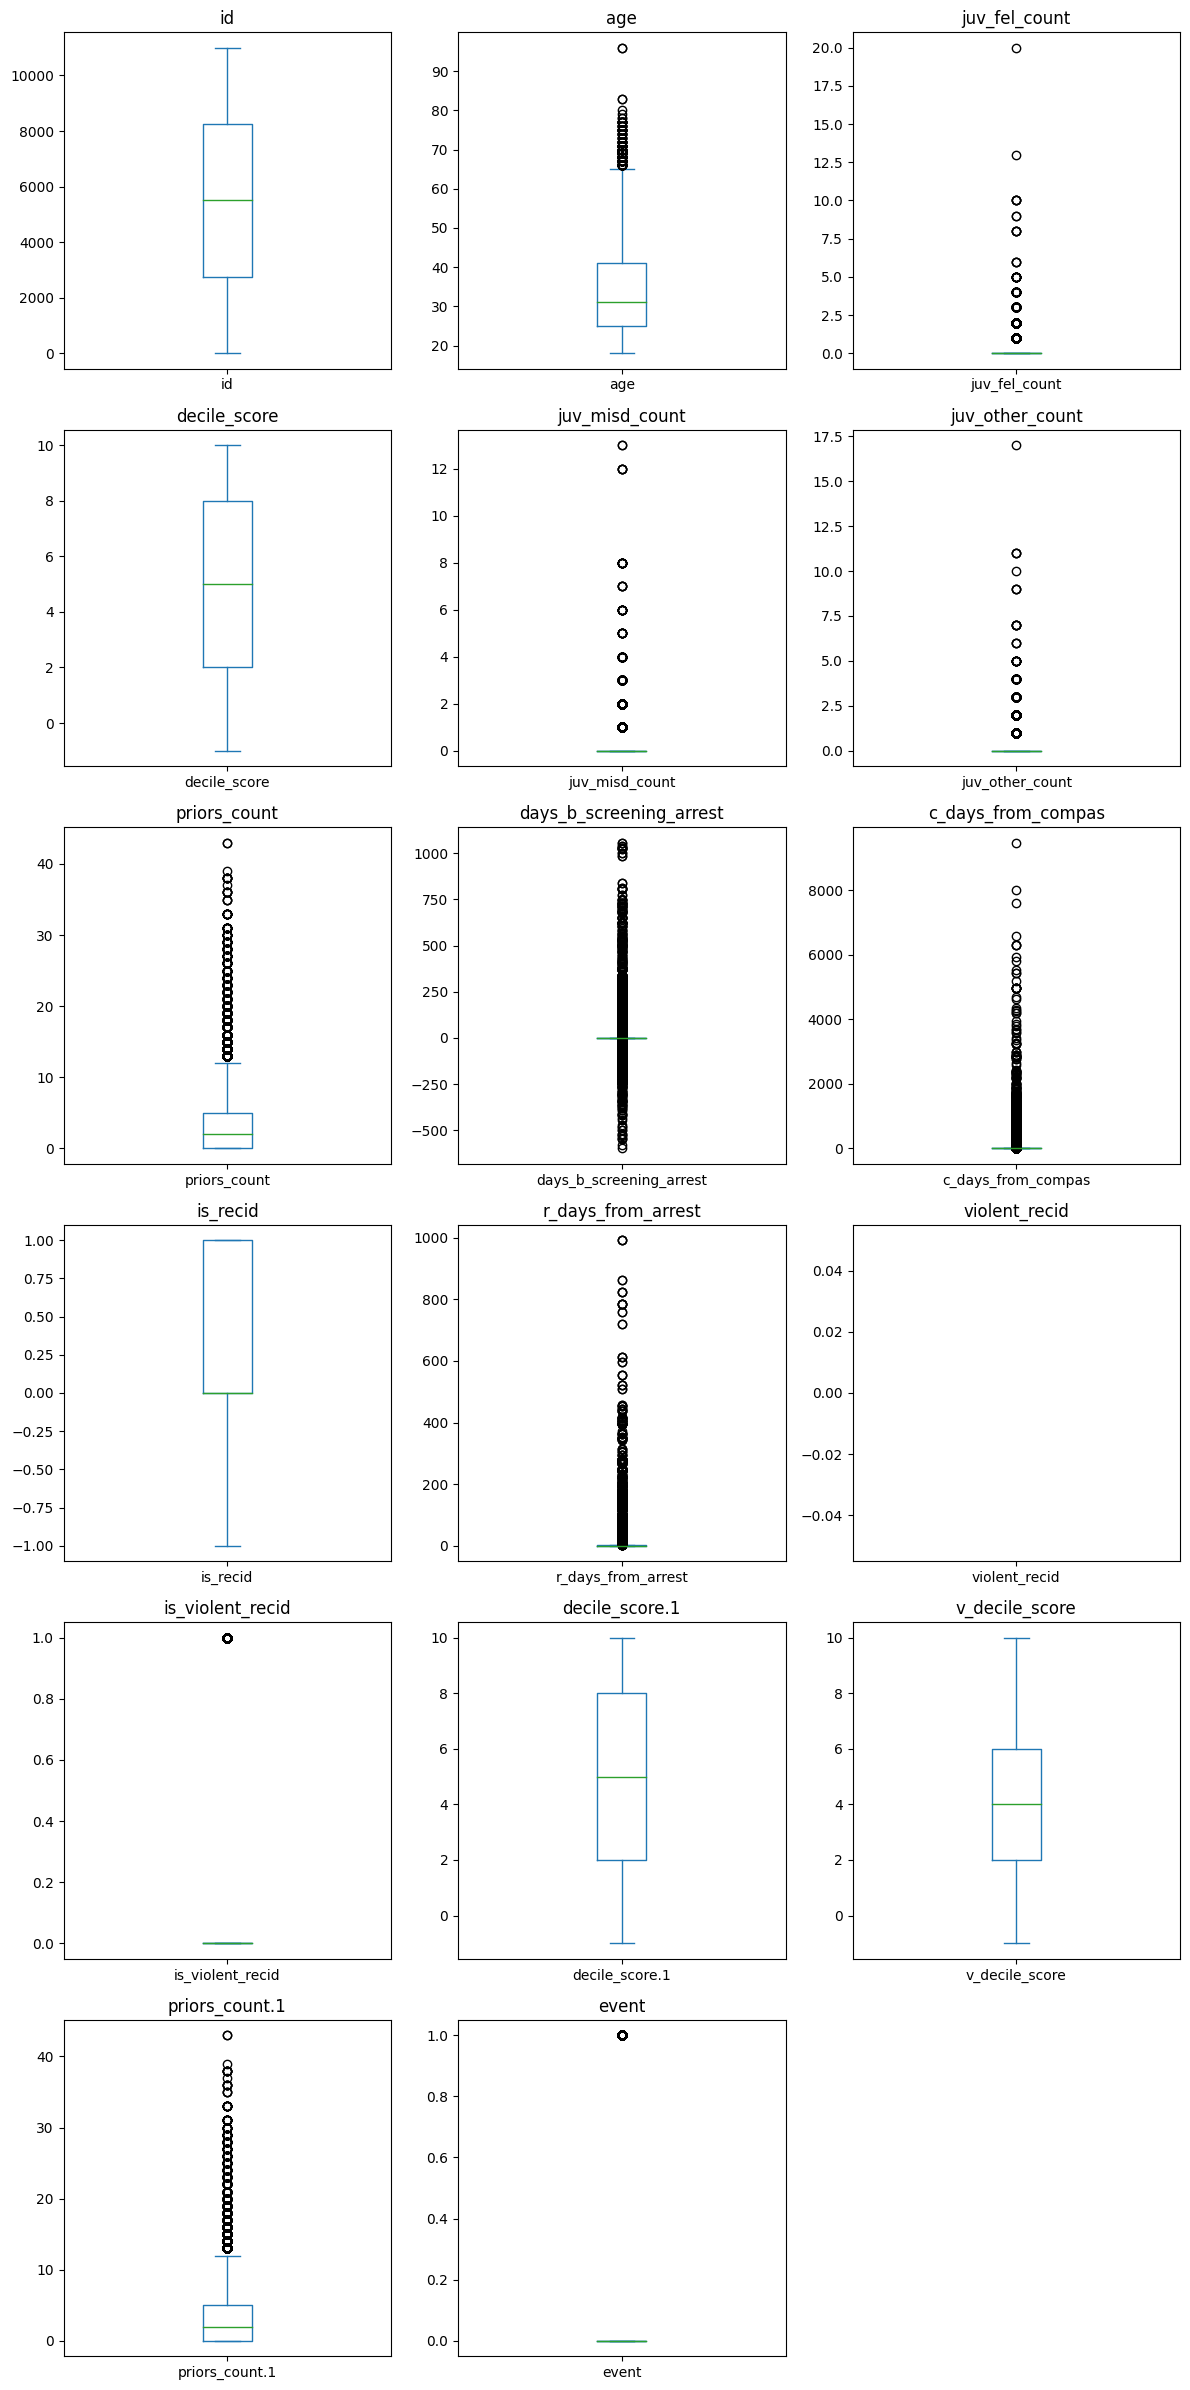

In [ ]:
# Se ejecuta la función getBoxplots para mostrar un gráfico boxplot de cada variable del dataframe
print("10. Boxplot visualization")
eda.getBoxplots()

## Histograma

Los histogramas son un tipo de gráfica que permiten observar con mayor claridad la distribución de los datos de una variables, en este punto se generará un histograma para cada variable numérica presente en el dataset de partida, a raíz de estos gráficos se pueden extraer las siguientes conclusiones:
* age: la gran mayoría de crímenes se cometen en la juventud y a medida que aumenta la edad se reducen escalonadamente.
* decile_score: el algoritmo tiende a emitir evaluaciones con valores extremos, es decir, es muy poco probable que vuelva a cometer un crímen o por el contrario es extremadamente probable que vuelva a hacerlo, el resto de valores de riesgo intermedios obtienen frecuencias de aparición similares.
* is_recid: la cantidad de gente que no vuelve a cometer un delito está muy balanceada con la que sí vuelve a cometerlo, lo cual cuadra con los valores más frecuentes de predicciones comentadas en el punto anterior.
* is_violent_recid: a diferencia del punto anterior, aquellos que han cometido un delito con violencia tienen una escasa probabilidad de volver a cometer otro de esta índole.
* v_decile_score: las predicciones de cometer otro delito con violencia son mucho menos que las de no volver a hacerlo, este hecho tiene sentido en base a la observación del apartado anterior, si embargo la frecuencia de predicción de cometer un crimen con violencia de nuevo es mucho mayor que el porcentaje real de sucesos de este tipo.

11. Histogram visualization with 10 bins


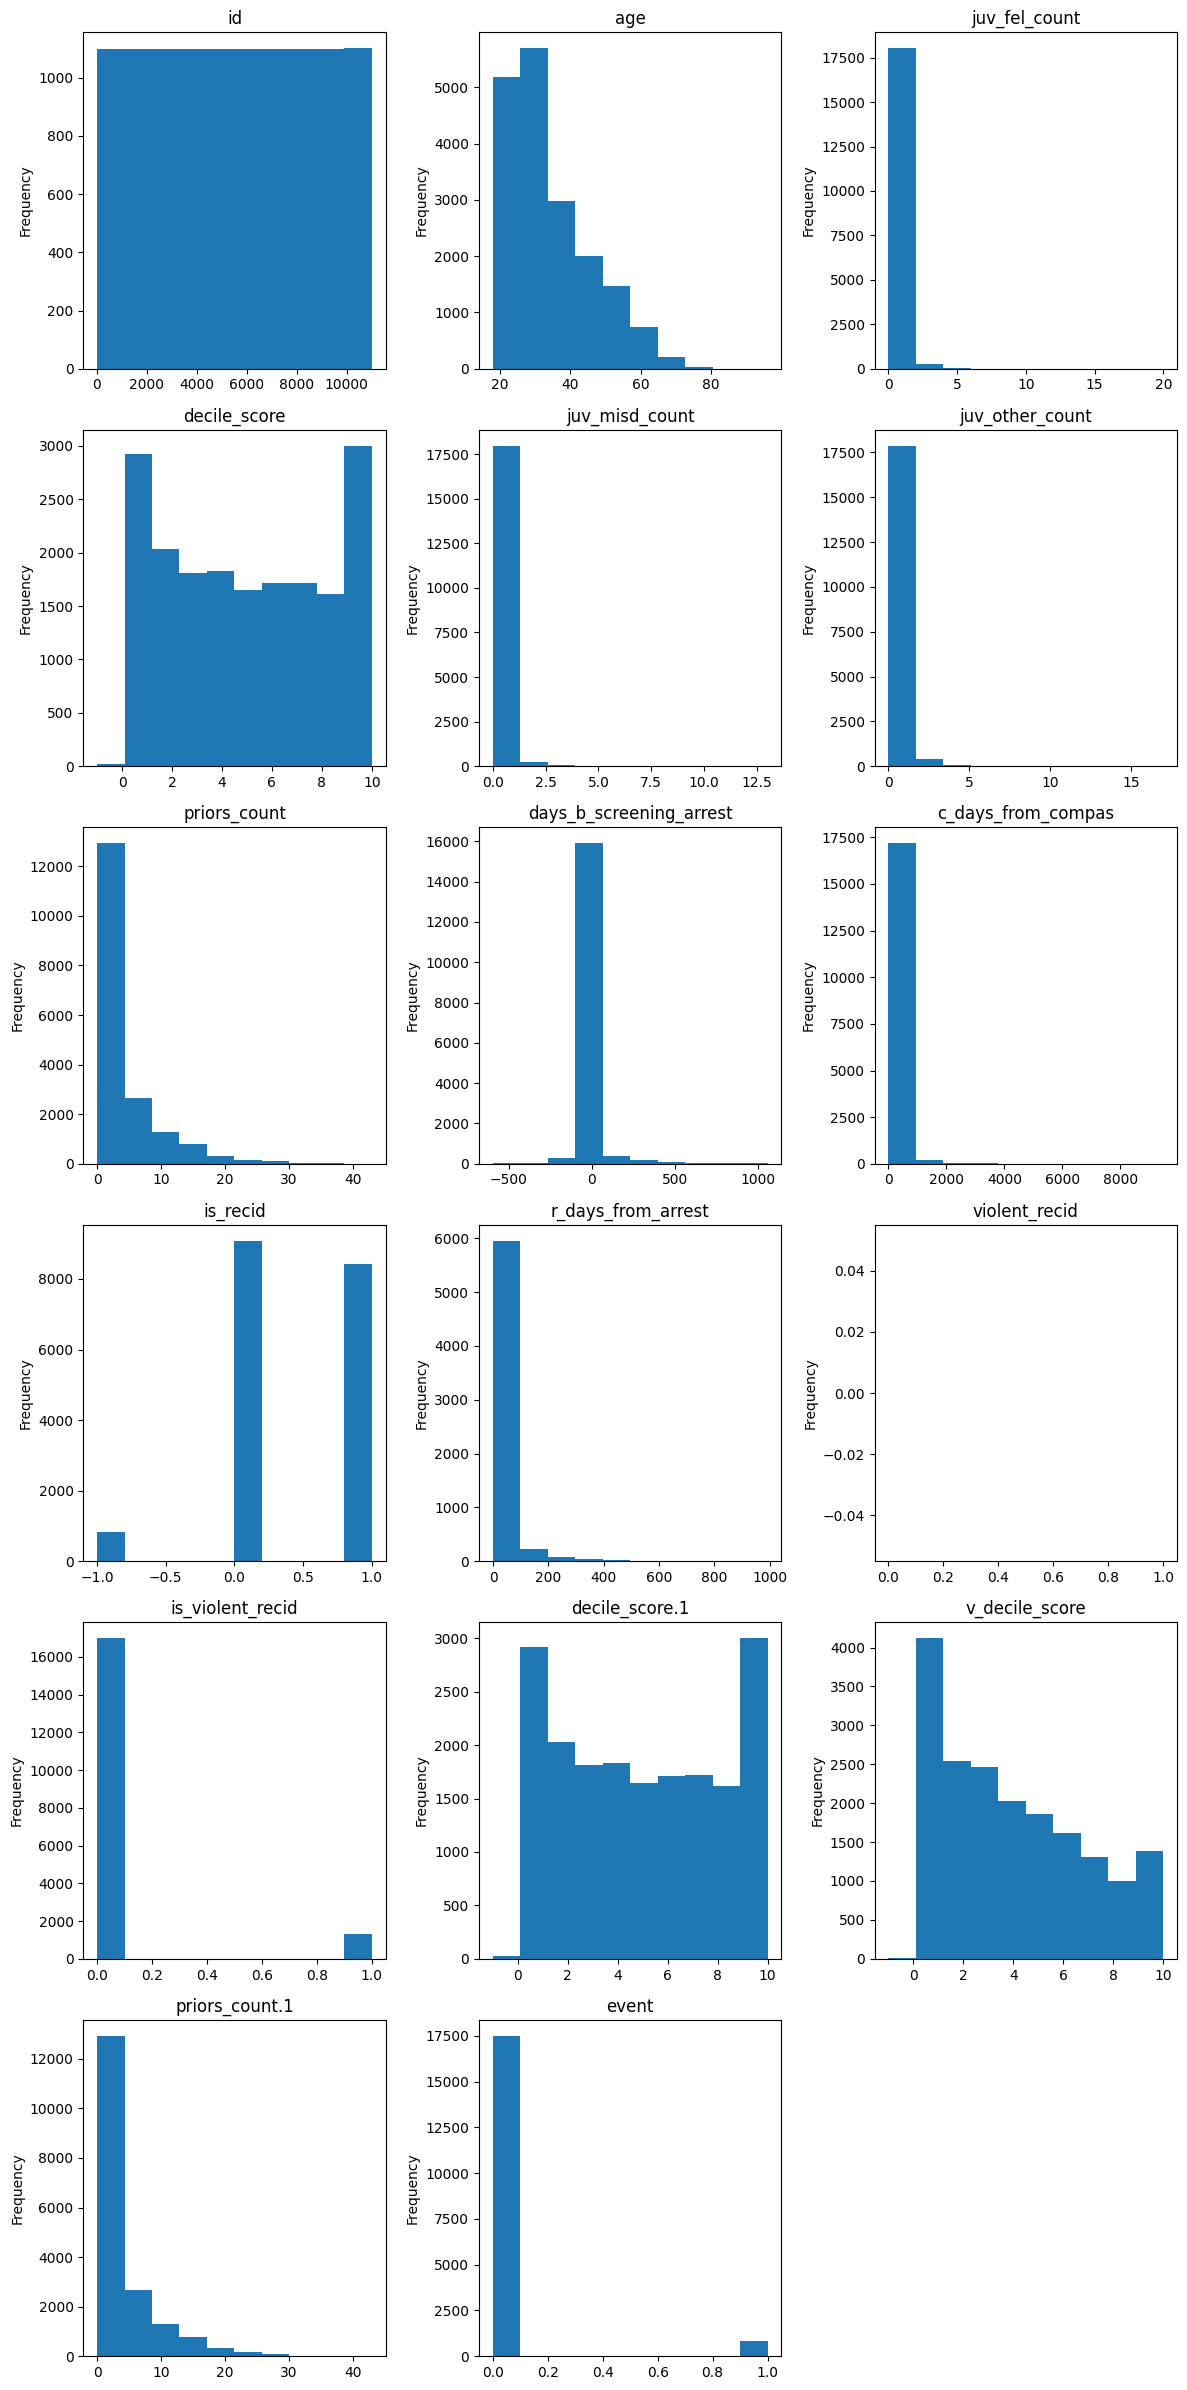

In [ ]:
# Se ejecuta la función getHistograms para mostrar un histograma de 10 bins para cada variable numérica del dataframe
print("11. Histogram visualization with 10 bins")
eda.getHistograms()

# Análisis Descriptivo de los Datos

En el análisis descriptivo de los datos se realizará un estudio de la relación entre las características personales de los delincuentes respecto a la probabilidad de reincidencia emitida por el algoritmo COMPASS, para ello la exploración se apoyará en una serie de gráficos y recursos visuales que permitan obtener una evidencia clara de la relación entre estas variables:
* La matriz de correlación permite observar el grado de relación que se da entre las distintas variables, es decir, como de influyente resulta el valor de una para otra. Mediante este tipo de gráfico es posible analizar qué variables pueden resultar más importantes a la hora de predecir otras.
* Los ráficos de dispersión permiten comparar la relación entre los valores de distintas variables.
* Los gráficos boxplot permiten observar entre dos variables el rango intercuartílico (IQR), los valores atípicos y la mediana, facilitando la identificación de la variabilidad, la asimetría y la presencia de datos anómalos.

## Matriz de correlación

En este caso, el estudio se centrará en la relación de la características personales relativas a la raza, el género y la catgoría de edad del sujeto respecto a la predicción almacenada en la variable decile_score. A priori, los valores obtenidos indican que dichas columnas tienen una baja correlación con la variable objetivo: age_cat (0.106986), sex (0.051537) y race (-0.312639), pero será mediante los siguientes puntos donde se obtenga una evidencia visual más representativa de la relación entre estos factores.

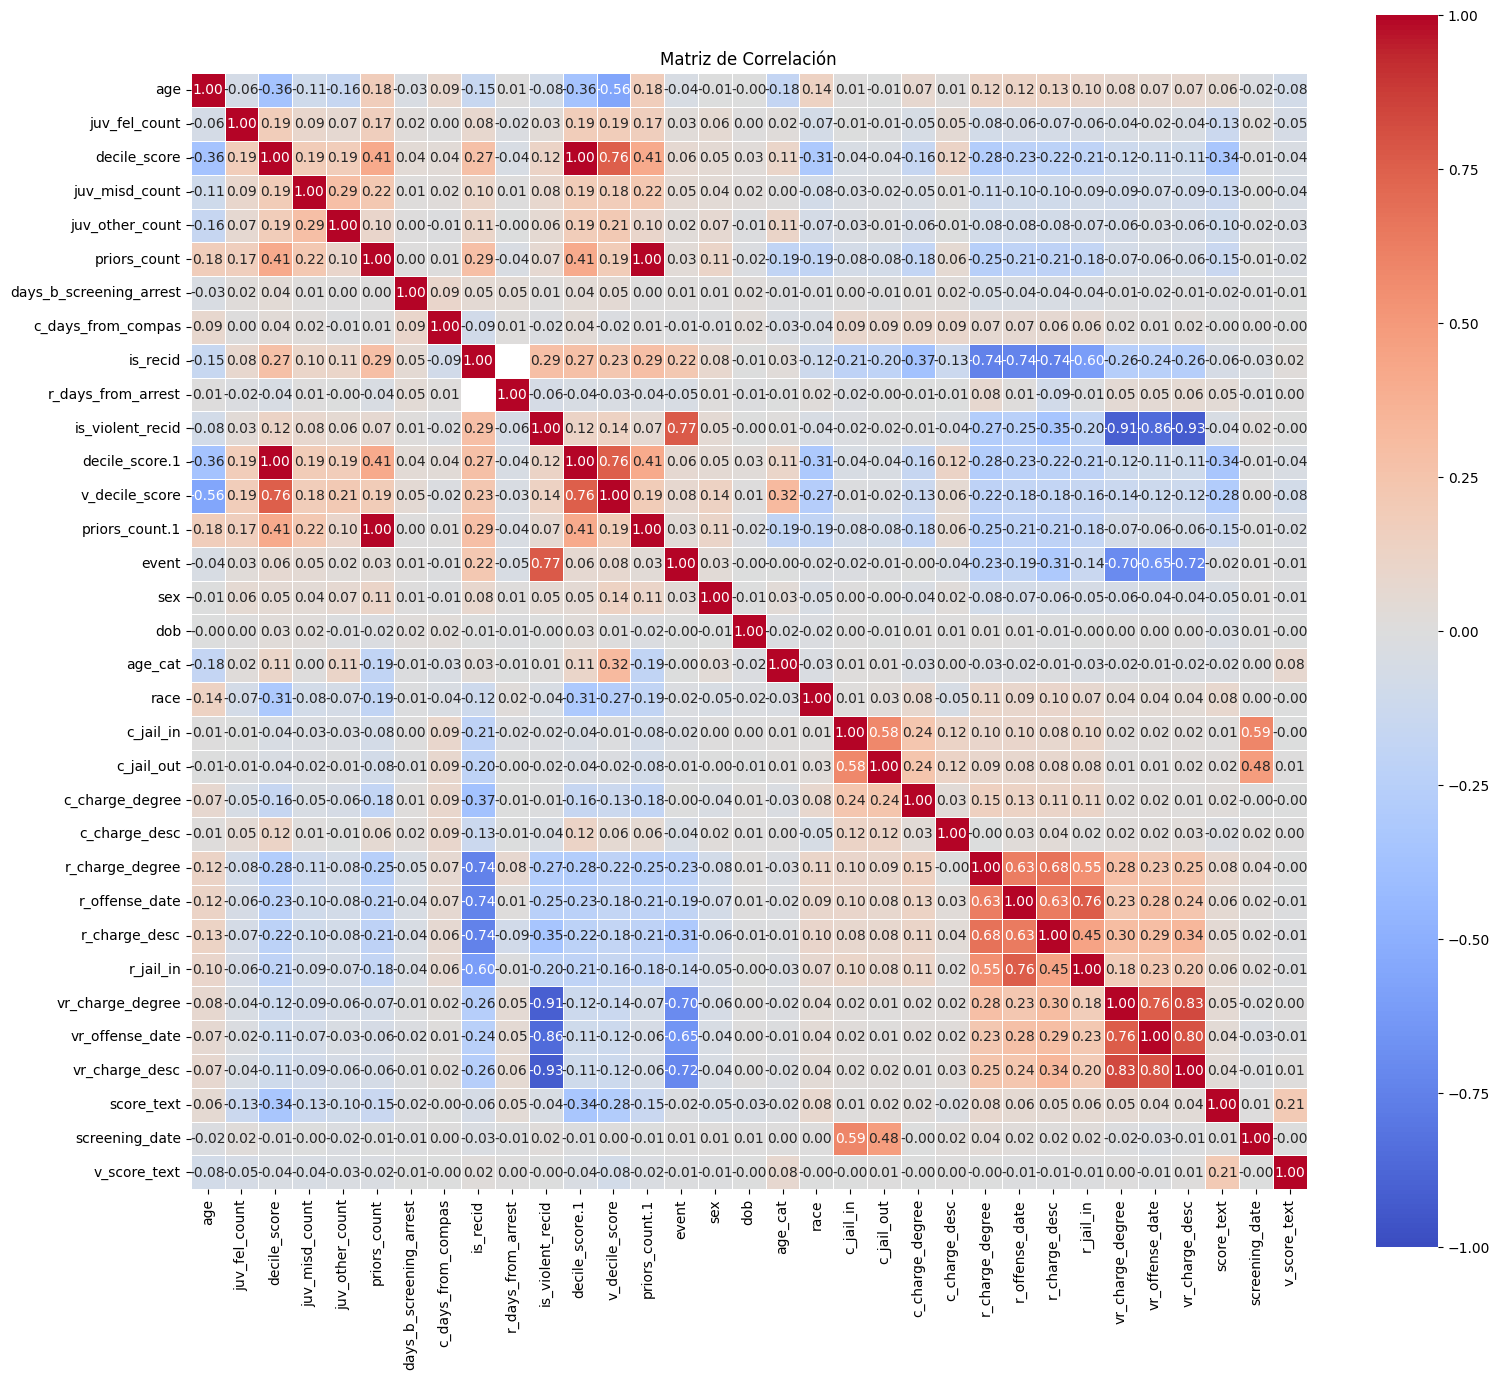


Correlación de las variables con Decile Score:
decile_score               1.000000
decile_score.1             1.000000
v_decile_score             0.757704
priors_count               0.412646
priors_count.1             0.412646
is_recid                   0.273761
juv_misd_count             0.192652
juv_fel_count              0.185765
juv_other_count            0.185738
is_violent_recid           0.120235
c_charge_desc              0.119864
age_cat                    0.106986
event                      0.064786
sex                        0.051537
days_b_screening_arrest    0.041290
c_days_from_compas         0.036938
dob                        0.026657
screening_date            -0.007874
v_score_text              -0.035996
c_jail_out                -0.036659
c_jail_in                 -0.039815
r_days_from_arrest        -0.039894
vr_charge_desc            -0.106243
vr_offense_date           -0.107443
vr_charge_degree          -0.119272
c_charge_degree           -0.157925
r_jail_in       

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Supongamos que `dataframe` ya está cargado como un DataFrame de pandas

# Excluir las columnas `id`, `name`, `first`, `last`, `violent_recid`, 'type_of_assessment', 'v_type_of_assessment'
relevant_columns = [col for col in dataframe.columns if col not in ['id', 'name', 'first', 'last', 'violent_recid', 'type_of_assessment', 'v_type_of_assessment']]

# Seleccionar solo las columnas numéricas y categóricas después de la exclusión en el nuevo DataFrame
numerical_columns = dataframe[relevant_columns].select_dtypes(include=['int64', 'float64'])
categorical_columns = dataframe[relevant_columns].select_dtypes(include=['object'])

# Inicializar LabelEncoder
label_encoder = LabelEncoder()

# Aplicar LabelEncoder a las columnas categóricas en el nuevo DataFrame
for col in categorical_columns.columns:
    new_dataframe[col] = label_encoder.fit_transform(dataframe[col])

# Concatenar las columnas numéricas con las categóricas transformadas en el nuevo DataFrame
new_dataframe = pd.concat([numerical_columns, new_dataframe[categorical_columns.columns]], axis=1)

# Calcular matriz de correlación para el nuevo DataFrame
correlation_matrix = new_dataframe.corr()

# Filtrar solo la correlación de las variables con `decile_score`
correlation_with_decile_score = correlation_matrix['decile_score'].sort_values(ascending=False)

# Ajustar el tamaño de la figura para mejorar la visualización
plt.figure(figsize=(18, 16))

# Crear mapa de calor de la matriz de correlación
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, square=True, fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correlación')
plt.yticks(rotation=0)  # Rotar etiquetas del eje y para mejor visualización
plt.show()

# Imprimir correlación de las variables con `decile_score`
print("\nCorrelación de las variables con Decile Score:")
print(correlation_with_decile_score)

## Raza

En este punto se comprobará la relación entre la raza de los individuos y la predicción de riesgo de reincidencia emitida por el algoritmo COMPASS. Como se puede apreciar las razas que obtienen un mayor valor de riesgo medio son los afroamericanos y los hispanos nativos, mientras que el resto de razas de piel más clara obtienen valores más bajos y bastante igualados.



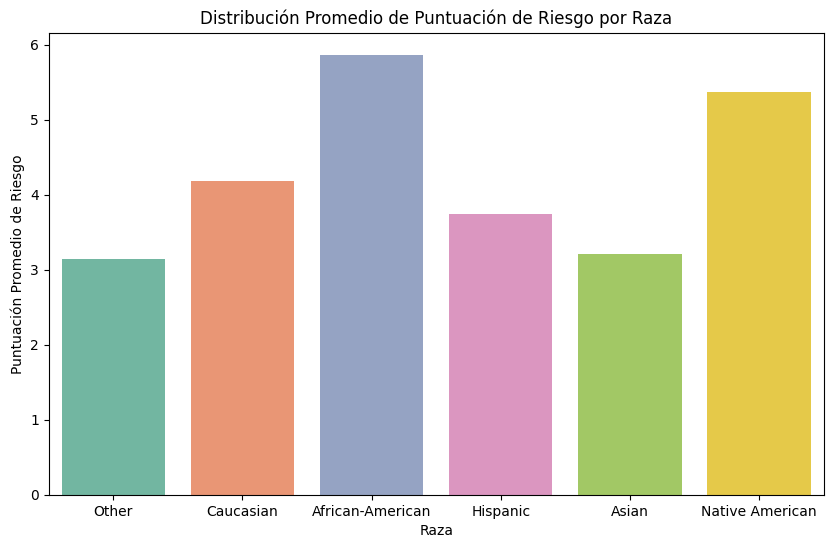

In [ ]:
# Gráfico de barras de la puntuación de riesgo por raza
plt.figure(figsize=(10, 6))
sns.barplot(x='race', y='decile_score', data=dataframe, hue='race', dodge=False, errorbar=None, palette="Set2", legend=False)
plt.title('Distribución Promedio de Puntuación de Riesgo por Raza')
plt.xlabel('Raza')
plt.ylabel('Puntuación Promedio de Riesgo')
plt.show()

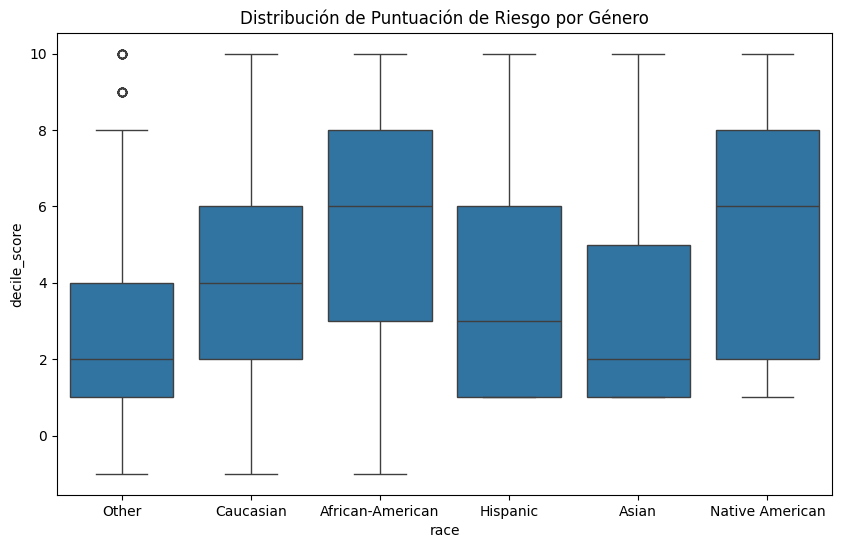

In [ ]:
# Distribución de la puntuación de riesgo por raza
plt.figure(figsize=(10, 6))
sns.boxplot(x='race', y='decile_score', data=dataframe)
plt.title('Distribución de Puntuación de Riesgo por Género')
plt.show()

## Género

El presente apartado estudiará la relación entre el género de los delincuentes y la predicción de riesgo de reincidencia emitida por el algoritmo COMPASS. En base a los gráficos generados es posible anunciar que ambos géneros tienen un valor medio de predicción de riesgo similar, siendo ligeramente superior en hombres y con un rango intercuartílico superior mayor al de la mujer.

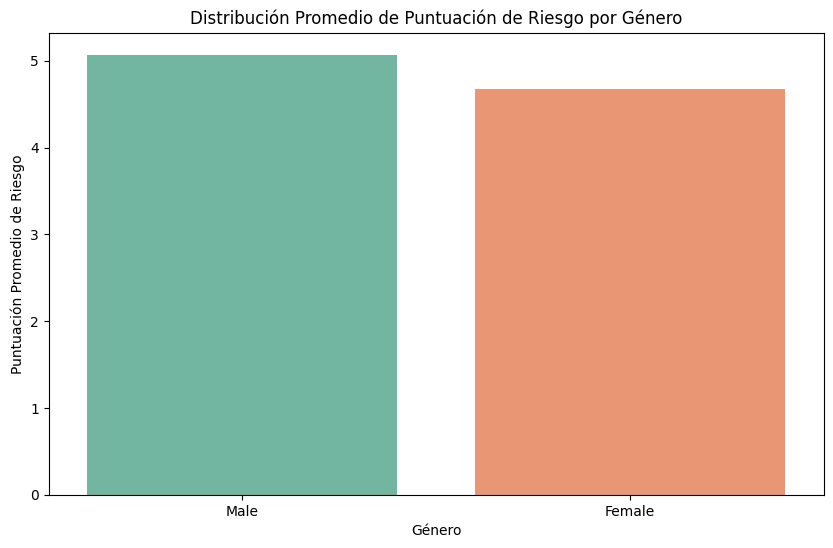

In [ ]:
# Gráfico de barras de la puntuación de riesgo por género
plt.figure(figsize=(10, 6))
sns.barplot(x='sex', y='decile_score', data=dataframe, hue='sex', dodge=False, errorbar=None, palette="Set2", legend=False)
plt.title('Distribución Promedio de Puntuación de Riesgo por Género')
plt.xlabel('Género')
plt.ylabel('Puntuación Promedio de Riesgo')
plt.show()

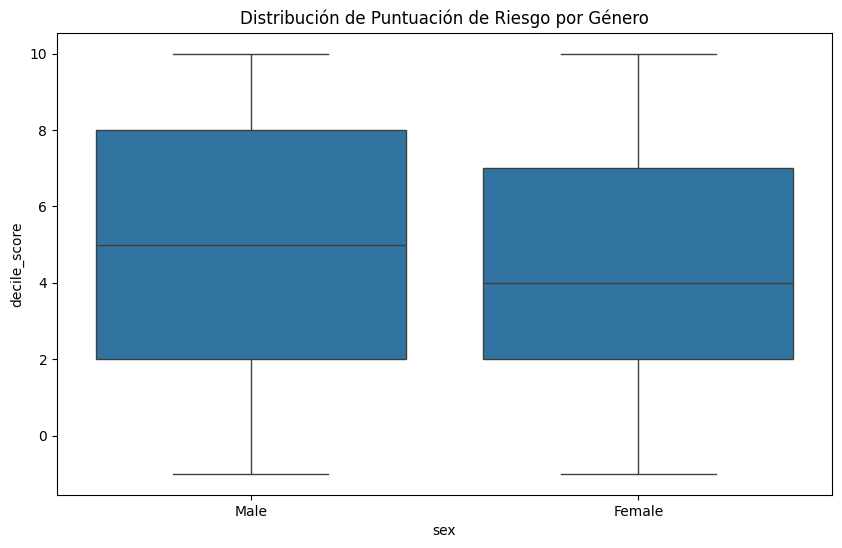

In [ ]:
# Distribución de la puntuación de riesgo por género
plt.figure(figsize=(10, 6))
sns.boxplot(x='sex', y='decile_score', data=dataframe)
plt.title('Distribución de Puntuación de Riesgo por Género')
plt.show()

## Rango de Edad

El presente apartado tiene como objetivo analizar la relación entre la categoría de edad de los individuos y la predicción de riesgo de reincidencia emitida por el algoritmo COMPASS. En este caso se puede observar de manera clara como a medida que aumenta la categoría de edad la predicción de riesgo decrece casi linealmente, lo cual puede implicar un cierto sesgo hacia los acusados de menor edad.

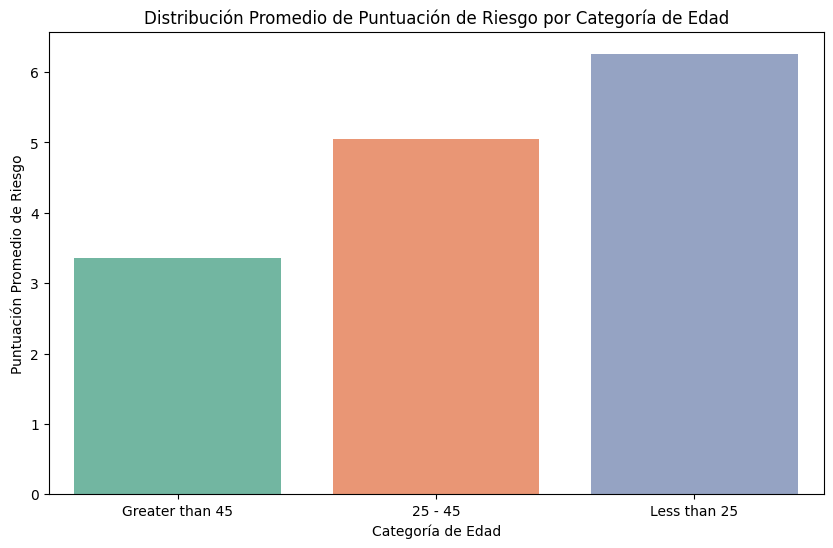

In [ ]:
# Gráfico de barras de la puntuación de riesgo por categoría de edad
plt.figure(figsize=(10, 6))
sns.barplot(x='age_cat', y='decile_score', data=dataframe, hue='age_cat', dodge=False, errorbar=None, palette="Set2", legend=False)
plt.title('Distribución Promedio de Puntuación de Riesgo por Categoría de Edad')
plt.xlabel('Categoría de Edad')
plt.ylabel('Puntuación Promedio de Riesgo')
plt.show()

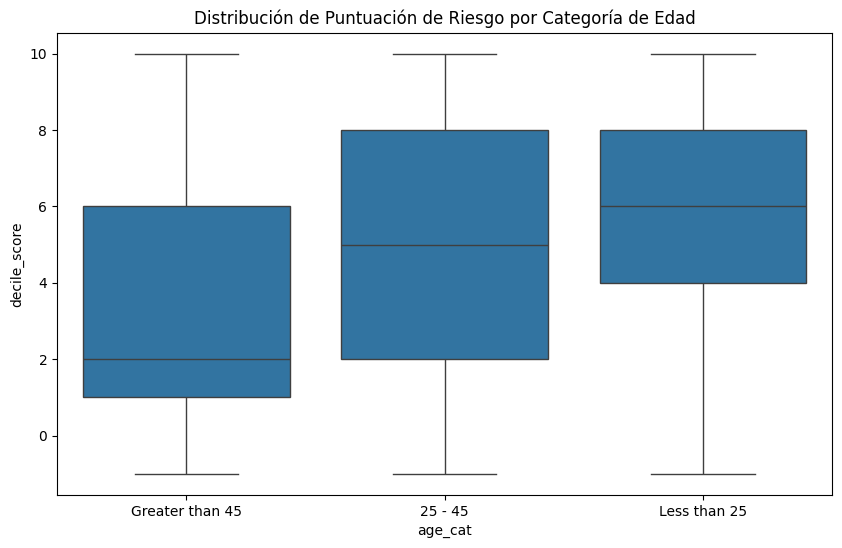

In [ ]:
# Distribución de la puntuación de riesgo por categoría de edad
plt.figure(figsize=(10, 6))
sns.boxplot(x='age_cat', y='decile_score', data=dataframe)
plt.title('Distribución de Puntuación de Riesgo por Categoría de Edad')
plt.show()

## Raza & Género & Categoría de Edad

Por último, en este punto se realizará un análisis conjunto de las tres variables estudiadas anteriormente, con el objetivo de evaluar si en alguno de los casos la combinación de variables produce un efecto distinto al de las mismas por separado.

Para la categoría de edad de mayores de 45 se mantiene una distribución entre razas parecida a la que ya se observó, respecto al género destaca que en el caso de los hispanos de más de 45 años hay un fuerte desbalance, teniendo casi el doble de probabilidad de reincidir los hombres frente a las mujeres.

Respecto a la categoría de 25 a 45 años, se puede apreciar que la raza caucásica alcanza unos niveles de probabilidad de reincidencia parecidos a los de las razas afroamericanas y nativoamericanas que eran las de probabilidad de criminalidad. Acerca del género, se puede observar como las mujeres asíaticas tienen menos de la mitad de probabilidad que sus homónimos varones, siendo además el grupo con menor probabilidad de volver a cometer un crimen de manera global, lo cual contrasta con las mujeres nativoamericanas que muestran un mayor grado de probabilidad que los varones y convirtiéndose en el grupo con mayor probabilidad de reincidencia global.

Únicamente resta comentar el caso de los menores de 25, los cuales presentan el mayor equilibrio de probabilidad de volver a delinquir entre todas las razas, siendo todas estas bastante parejas, sobre el género destaca el desbalance que se da entre los asiáticos con una mucho mayor tasa de probabilidad por parte de las mujeres, además de sorprender la falta de datos sobre mujeres nativoamericanas menores de 25 años.

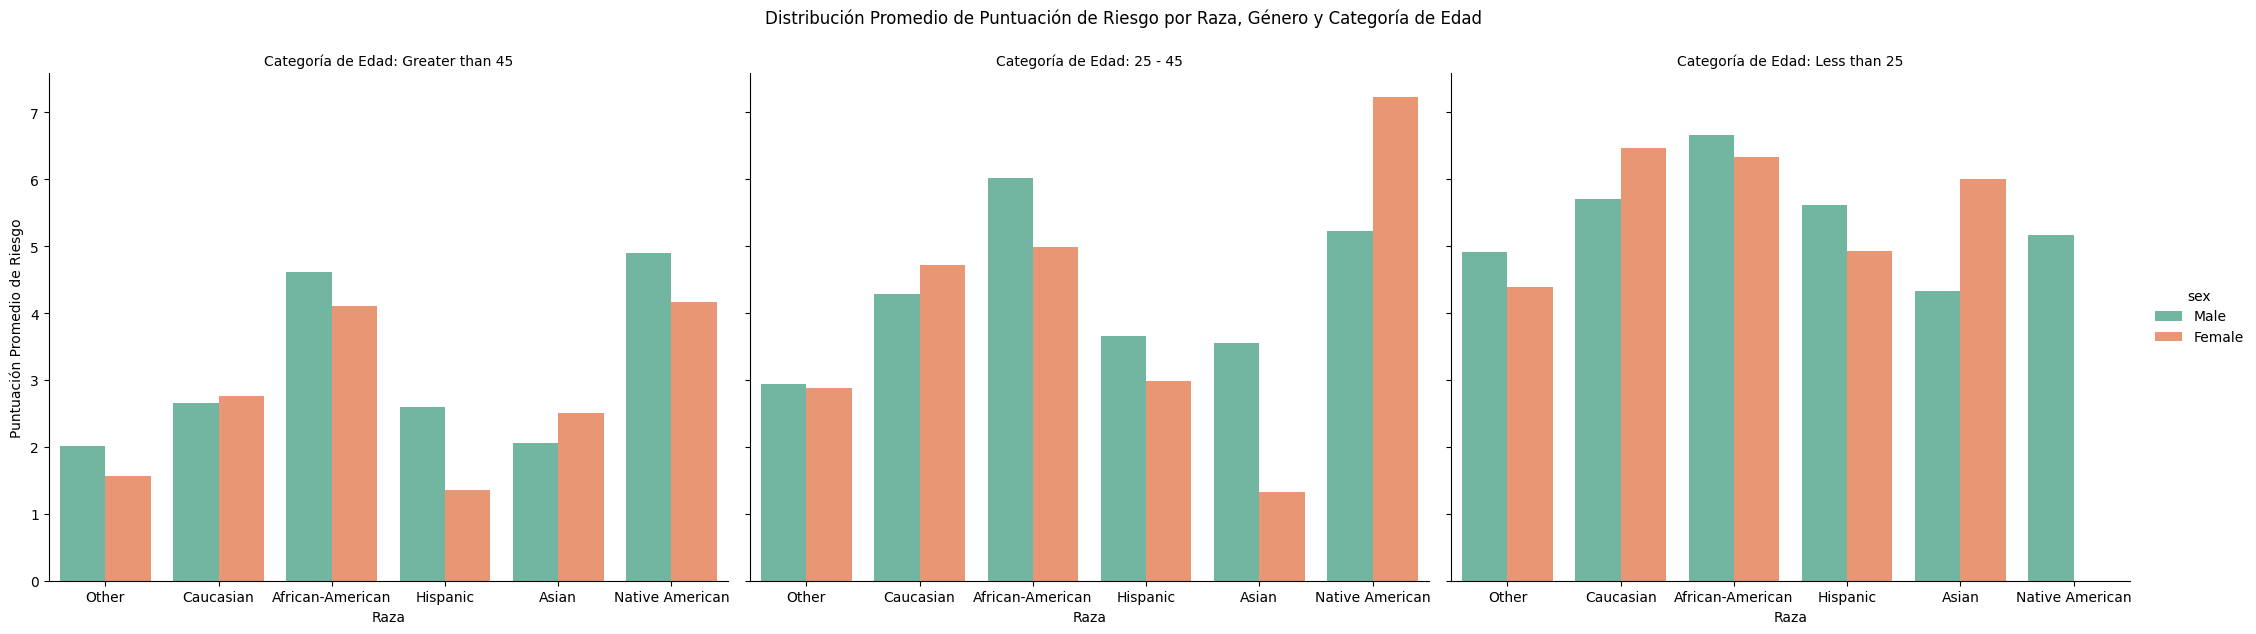

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Supongamos que `compas_data` ya está cargado como un DataFrame de pandas

# Gráfico de barras de la puntuación de riesgo por raza, diferenciando por género y categoría de edad
g = sns.catplot(
    data=dataframe,
    kind="bar",
    x="race",
    y="decile_score",
    hue="sex",
    col="age_cat",
    errorbar=None,
    palette="Set2",
    dodge=True,
    height=6,
    aspect=1.2
)

g.set_axis_labels("Raza", "Puntuación Promedio de Riesgo")
g.set_titles("Categoría de Edad: {col_name}")
g.fig.suptitle('Distribución Promedio de Puntuación de Riesgo por Raza, Género y Categoría de Edad', y=1.05)
plt.show()

# Identificación de Sesgos

Uno de los puntos claves de este trabajo es la identificación de sesgos mediante la comparación entre la predicción emitida por el algoritmo y el valor de reincidencia real del individuo, para ello estudiaremos esta diferencia dividiendo a los sujetos por grupos en base a su raza, género y edad, de modo que sea posible apreciar el impacto de estas características en la diferencia de valores.

## Métricas de evaluación

La evaluación de la calidad de las predicciones del modelo se realizará utilizando:
* Precission: la precisión se refiere a la proporción de predicciones positivas correctas entre todas las predicciones positivas, indicando cuántas de las instancias etiquetadas como positivas por el modelo son realmente positivas.
* Recall: la exhaustividad se refiere a la proporción de instancias positivas que fueron correctamente identificadas por el modelo entre todas las instancias positivas reales, mostrando cuántas de las instancias positivas reales fueron capturadas por el modelo.
* F1 score: muestra la media entre la precisión y la exhaustividad del modelo.
* Diferencia entre la media de la predicción y el valor real.

La variable de reincidencia real (is_recid) solo admite valores de 0 a 1, por lo que la media de valores para los distintos grupos seleccionados siempre se encontrará enmarcada entre dichos dígitos, sin embargo la predicción emitida por COMPASS se encuentra entre 0 y 10, para aplicar las métricas comentadas anteriormente se deben realizar transformaciones en los datos:
* Precission, Recall y F1-Score: en este caso las métricas comparan si los valores son iguales, dado que no tendría sentido intentar convertir la variable is_recid con valores 0 y 1 al rango de 1 a 10, lo que se debe hacer es trasnformar la variable decile_score del rango de 1 a 10 a valores 0 o 1, para ello consideraremos que un valor de predicción entre 1 y 5 supone un riesgo nulo de valor 0, mientras que una predicción entre 6 y 10 supone un riesgo real de valor 1.
* Diferencia de medias: para la diferencia de medias se tiene en cuenta el valor medio de cada variable, por lo que multiplicando los valores de la variable is_recid por 10 podemos llevarla al mismo rango en el que se encontrará la media de la variable decile_score.

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score
import warnings

# Función para calcular métricas por grupo
def calculate_metrics(true_labels, pred_labels):
    true_labels_resized = true_labels * 10
    pred_labels_resized = np.where((pred_labels >= 0) & (pred_labels <= 5), 0, np.where((pred_labels >= 6) & (pred_labels <= 10), 1, pred_labels))
    precision = precision_score(true_labels, pred_labels_resized, average='weighted', zero_division='warn')
    recall = recall_score(true_labels, pred_labels_resized, average='weighted', zero_division='warn')
    f1 = f1_score(true_labels, pred_labels_resized, average='weighted')
    # Calcular la diferencia entre las tasas de reincidencia real y predicha
    real_rate = true_labels_resized.mean()
    predicted_rate = pred_labels.mean()
    rate_difference = real_rate - predicted_rate
    return precision, recall, f1, rate_difference

## Raza

La evaluación basada en razas permite apreciar que el modelo tiende a tener buenos resultados de precisión y recall para algunos grupos, pero con grandes variaciones en la diferencia de tasas. El modelo tiende a subestimar la tasa real de reincidencia, con algunas diferencias más pronunciadas en ciertos grupos raciales:
* Other: el modelo tiene una precisión moderada pero un recall relativamente alto, por lo que el modelo puede identificar correctamente muchos casos positivos, pero también puede haber clasificado incorrectamente algunos negativos. La diferencia de tasas indica que el modelo sobreestima ligeramente la tasa de reincidencia real.
* Caucasian: el algoritmo ofrece una precisión y un recall bastante equilibrados, la diferencia de tasas negativa indica que el modelo subestima significativamente la tasa de reincidencia real entre los caucásicos.
* African-American: se obtiene una precisión y recall similares, pero ambos son relativamente bajos en comparación con otros grupos. La diferencia de tasas negativa sugiere una gran subestimación de la tasa real de reincidencia entre los afroamericanos por parte del modelo.
* Hispanic: el modelo posee una precisión relativamente baja pero un recall moderado, la diferencia de tasas negativa indica que el modelo subestima la tasa real de reincidencia entre los hispanos en una cantidad significativa.
* Asian: muestran los valores más altos de precisión, recall y F1-score entre todos los grupos raciales. Sin embargo, la diferencia de tasas negativa indica una subestimación considerable de la tasa real de reincidencia por parte del modelo.
* Native American: el modelo reporta valores altos tanto en precisión como en recall, indicando una capacidad significativa para identificar correctamente los casos positivos. La diferencia de tasas negativa sugiere una subestimación extrema de la tasa real de reincidencia entre los nativos americanos.

Como conclusión, los asiáticos y los nativos americanos tienen métricas de rendimiento más altas en comparación con otros grupos, mientras que los afroamericanos tienden a mostrar métricas más bajas en general.

In [ ]:
# Calcular métricas por raza
for race in dataframe['race'].unique():
    group = dataframe[dataframe['race'] == race]
    true_labels = group['is_recid']
    pred_labels = group['decile_score']
    with warnings.catch_warnings():
        warnings.filterwarnings("ignore", category=UserWarning)  # Ignorar todas las advertencias de sklearn
        try:
            precision, recall, f1, rate_difference = calculate_metrics(true_labels, pred_labels)
            print(f'Raza: {race}, Precisión: {precision}, Recall: {recall}, F1-score: {f1}, Diferencia de tasas: {rate_difference}')
        except Exception as e:
            print(f"Error calculando métricas para la raza '{race}': {str(e)}")

Raza: Other, Precisión: 0.5667364288877809, Recall: 0.6046511627906976, F1-score: 0.5531625538982298, Diferencia de tasas: 0.20465116279069795
Raza: Caucasian, Precisión: 0.5793905418949753, Recall: 0.6077883667433454, F1-score: 0.5828296006392066, Diferencia de tasas: -0.613703581991456
Raza: African-American, Precisión: 0.5807133639850256, Recall: 0.5886017771422735, F1-score: 0.5767333752075734, Diferencia de tasas: -1.0553569604739046
Raza: Hispanic, Precisión: 0.5523692159490059, Recall: 0.6057891109579601, F1-score: 0.5708718095970213, Diferencia de tasas: -0.9924190213645763
Raza: Asian, Precisión: 0.6449263764404609, Recall: 0.7183098591549296, F1-score: 0.675251509054326, Diferencia de tasas: -1.5211267605633805
Raza: Native American, Precisión: 0.6899576527525711, Recall: 0.7719298245614035, F1-score: 0.7283950617283951, Diferencia de tasas: -2.0350877192982453


## Género

La evaluación basada en el género de los delincuentes ofrece una información de gran relevancia a la hora de emitir conclusiones:
* Male: para los individuos de género masculino, el modelo muestra una precisión y recall equilibrados, ambos en el rango del 58-59%. El F1-score también es consistente con estos valores. La diferencia de tasas negativa indica que el modelo subestima la tasa real de reincidencia entre los hombres en un 69.4%.
* Female: para las mujeres, el modelo muestra una precisión y recall ligeramente más altos en comparación con los hombres, ambos alrededor del 60%. El F1-score también refleja esta mejora. Sin embargo, la diferencia de tasas negativa es más pronunciada, indicando una subestimación significativa de la tasa real de reincidencia entre las mujeres en un 153.7%.
Como resumen, el algoritmo presenta un rendimiento balanceado en términos de precisión y recall entre hombres y mujeres, aunque con una tendencia a subestimar más la tasa real de reincidencia entre las mujeres. A la vista de estas métricas se puede afirmar que el modelo no muestra un sesgo significativo en términos de rendimiento predictivo basado en el género.


In [ ]:
# Calcular métricas por género
for sex in dataframe['sex'].unique():
    group = dataframe[dataframe['sex'] == sex]
    true_labels = group['is_recid']
    pred_labels = group['decile_score']
    with warnings.catch_warnings():
        warnings.filterwarnings("ignore", category=UserWarning)  # Ignorar todas las advertencias de sklearn
        try:
            precision, recall, f1, rate_difference = calculate_metrics(true_labels, pred_labels)
            print(f'Género: {sex}, Precisión: {precision}, Recall: {recall}, F1-score: {f1}, Diferencia de tasas: {rate_difference}')
        except Exception as e:
            print(f"Error calculando métricas para el género '{sex}': {str(e)}")

Género: Male, Precisión: 0.582867802613584, Recall: 0.5950579254001206, F1-score: 0.5818688583241285, Diferencia de tasas: -0.6935645884952786
Género: Female, Precisión: 0.5956243595563105, Recall: 0.6118829441324268, F1-score: 0.5977749240729907, Diferencia de tasas: -1.536801655335501


## Categoría de Edad

La evaluación de las predicciones en función de la categoría de edad, arroja luz sobre los siguientes aspectos:
* Greater than 45: para individuos mayores de 45 años, el modelo muestra una precisión, recall y F1-score bastante consistentes alrededor del 60%. La diferencia de tasas negativa indica que el modelo subestima la tasa real de reincidencia en este grupo en un 51%.
* 25 - 45: los sujetos de entre 25 y 45 años, el modelo muestra valores de precisión y recall similares, ambos alrededor del 60%, el F1-score también está en este rango. La diferencia de tasas negativa indica que el modelo subestima la tasa real de reincidencia en este grupo en un 79%.
* Less than 25: en aquellos individuos menores de 25 años, el modelo muestra valores de precisión, recall y F1-score más bajos en comparación con los otros grupos de edad, alrededor del 54-56%. La diferencia de tasas negativa es la más alta entre las categorías de edad analizadas, indicando una subestimación significativa de la tasa real de reincidencia en un 127%.

En general se puede afirmar que el algoritmo muestra un rendimiento relativamente consistente en términos de precisión, recall y F1-score a través de las diferentes categorías de edad. Sin embargo, hay una tendencia clara a subestimar la tasa real de reincidencia, especialmente en los grupos más jóvenes (menores de 25 años) y de mediana edad (25-45 años), concretamente la mayor subestimación se observa en el grupo de edad menos de 25 años, donde la diferencia de tasas es considerablemente alta (127%).

In [ ]:
# Calcular métricas por categoría de edad
for age_cat in dataframe['age_cat'].unique():
    group = dataframe[dataframe['age_cat'] == age_cat]
    true_labels = group['is_recid']
    pred_labels = group['decile_score']
    with warnings.catch_warnings():
        warnings.filterwarnings("ignore", category=UserWarning)  # Ignorar todas las advertencias de sklearn
        try:
            precision, recall, f1, rate_difference = calculate_metrics(true_labels, pred_labels)
            print(f'Categoría de Edad: {age_cat}, Precisión: {precision}, Recall: {recall}, F1-score: {f1}, Diferencia de tasas: {rate_difference}')
        except Exception as e:
            print(f"Error calculando métricas para la categoría de edad '{age_cat}': {str(e)}")

Categoría de Edad: Greater than 45, Precisión: 0.5960924556702102, Recall: 0.6356186834198306, F1-score: 0.6054597512988044, Diferencia de tasas: -0.5099699535645996
Categoría de Edad: 25 - 45, Precisión: 0.5974058138284961, Recall: 0.6008484381025839, F1-score: 0.5885058884738961, Diferencia de tasas: -0.7937716930196688
Categoría de Edad: Less than 25, Precisión: 0.5397230631886464, Recall: 0.5596544478169507, F1-score: 0.5455698278740663, Diferencia de tasas: -1.2738734531870186


# Evaluación del Impacto del Sesgo

A través de los anteriores puntos se han implementado diversas técnicas de análisis con el objetivo de advertir la presencial de posibles sesgos en el algoritmo COMPASS a la hora se emitir sus predicciones de riesgo de reincidencia en función de la raza, género y categoría de edad.

Una vez identificadas dichas tendencias del modelo, solo queda determinar el impacto que han tenido y evaluar como han afectado a los distintos delincuentes en función de sus características personales.

## Matriz de confusión

La matriz de confusión es una técnica utilizada en el análisis de modelos de clasificación para evaluar su rendimiento, se trata de una tabla conformada por los siguientes valores:
* Verdaderos Positivos (TP): instancias correctamente clasificadas como positivas.
* Falsos Positivos (FP): instancias incorrectamente clasificadas como positivas.
* Verdaderos Negativos (TN): instancias correctamente clasificadas como negativas.
* Falsos Negativos (FN): instancias incorrectamente clasificadas como negativas.

En este apartado se empleará la matriz de confusión para estudiar el rendimiento del modelo según el grupo al que pertenecen los delincientes para cada característica de interés (raza, género y categoría de edad), de este modo es posible analizar sesgos o desigualdades en las predicciones.

Dado que la técnica únicamente compara si los valores de predicción y de riesgo real son iguales, teniendo en cuenta que la variable de reincidencia real (is_recid) solo admite valores de 0 a 1, mientras que la predicción emitida por COMPASS se encuentra entre 1 y 10, para poder aplicar la técnica es necesario transformar los datos.

No tendría sentido intentar convertir la variable is_recid con valores 0 y 1 al rango de 1 a 10, puesto que todos los valores entre medias no aparecerían, en este caso se modificará la variable decile_score del rango de 1 a 10 a valores 0 o 1, para ello consideraremos que un valor de predicción entre 1 y 5 supone un riesgo nulo de valor 0, mientras que una predicción entre 6 y 10 supone un riesgo real de valor 1.

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

# Función para calcular matriz de confusión por grupo y mostrarla
def display_confusion_matrix(grupo_name, true_labels, pred_labels):
    indices = true_labels != -1

    # Filtrar true_labels y pred_labels
    true_labels_filtered = true_labels[indices]
    pred_labels_filtered = pred_labels[indices]

    # Redimensionar pred_labels_filtered
    pred_labels_resized = np.where((pred_labels_filtered >= 0) & (pred_labels_filtered <= 5), 0, np.where((pred_labels_filtered >= 6) & (pred_labels_filtered <= 10), 1, pred_labels_filtered))

    # Obtener las clases únicas presentes en true_labels_filtered y pred_labels_resized
    unique_classes = np.unique(true_labels_filtered)

    # Calcular la matriz de confusión con true_labels_filtered y pred_labels_resized
    cm = confusion_matrix(true_labels_filtered, pred_labels_resized, labels=unique_classes)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=unique_classes)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f"Matriz de Confusión - {grupo_name}")
    plt.xlabel('Predicciones')
    plt.ylabel('Valores Verdaderos')
    plt.gcf().set_size_inches(6, 4)  # Ajustar el tamaño de la gráfica a 6x4 pulgadas
    plt.show()

## Raza

Respecto a la raza se pueden emitir las siguientes reflexiones:

* Other: el modelo tiene un rendimiento extremadamente negativo a la hora de predecir de manera correcta a aquellos sujetos que sí volvieron a delinquir, solo predice acertadamente que volverán a delinquir una pequeña minoría, por tanto se podría valorar la presencia de un sesgo a la hora de afirmar que no volverían a delinquir.

* Caucasian: para esta raza el algoritmo también presenta problemas a la hora de identificar como a reincidentes a aquellos que volvieron a delinquir, pero a diferencia del punto anterior se da un mayor balance frente a la correcta identificación de los que sí volvieron a hacerlo, tan solo se podría considerar un posible sesgo a la hora de predecir que no volverían a cometer crímenes cuando sí que lo hicieron.

* African-Ametican: en el caso de los afroamericanos, se les suele etiquetar mayoritariamente como reincidentes y correspondientemente vuelven a delinquir, además presenta tasas de fallo equilibradas tanto al predecir que sí como que no lo volverían a cometer, las cuales aunque son mucho menores que sus aciertos presentan un valor considerable, por lo que puede presentar un sesgo hacia esta raza.

* Hispanic: a la inmensa mayoría de hispanos se les etiqueta como no reincidentes, y efectivamente no vuelven a reincidir, por lo que se podría decir que no presenta grandes sesgos con esta raza, salvo algunos casos en los que no se identifica correctamente a algunos reincidentes.

* Asian: para los asiáticos se da el mismo caso que para los hispanos, la mayoría no vuelve a reincidir y por tanto se les etiqueta de este modo, en este caso presenta una tasa de error muy reducida, debido a ello se descarta la presencia de sesgos hacia esta raza.

* Native-American: esta es la raza que mejores tasas de acierto y por tanto menos tasas de error ha obtenido, también puede ser debido al bajo número de muestras que se tienen de estos, pero por el momento se pueden descartar sesgos hacia este grupo.

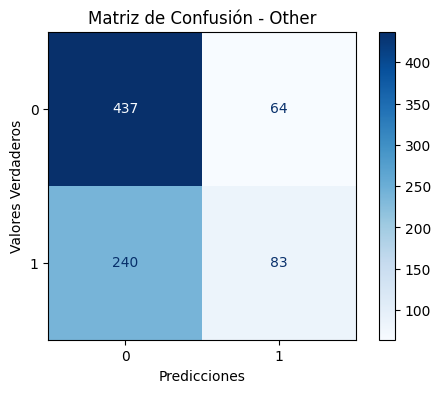

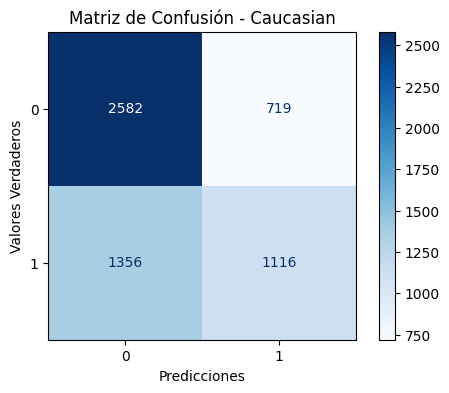

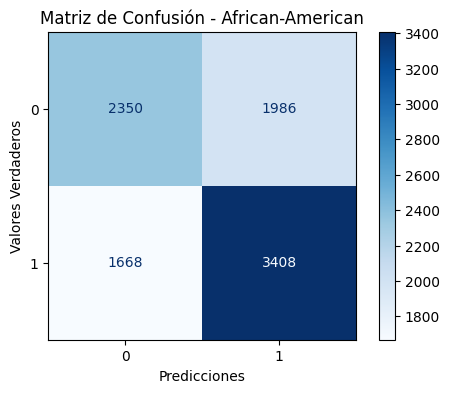

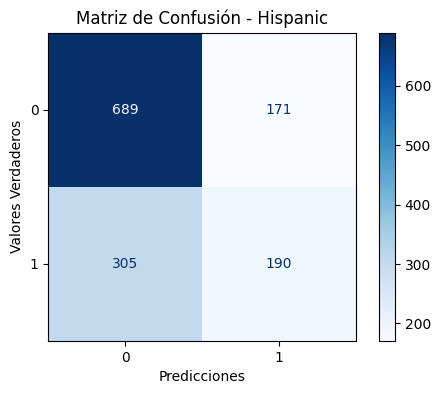

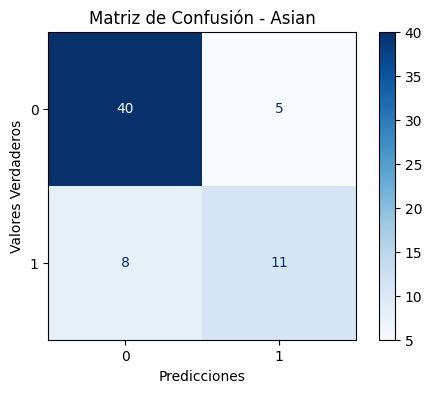

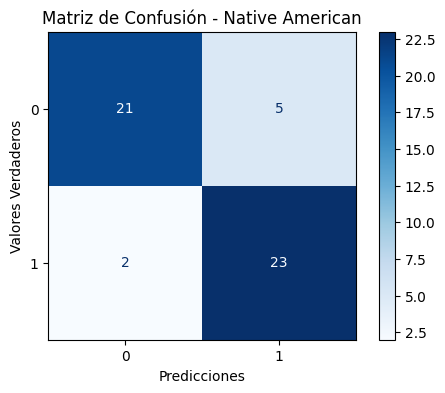

In [ ]:
# Matriz de confusión por raza
for race in dataframe['race'].unique():
    grupo = dataframe[dataframe['race'] == race]
    true_labels = grupo['is_recid']
    pred_labels = grupo['decile_score']
    display_confusion_matrix(race, true_labels, pred_labels)

## Género

En este punto se considerará la presencia de sesgos en base al género de los delincuentes:

* Male: los hombres tienen unas tasas de acierto altas, sin embargo las tasas de error pueden suponer más de la mitad de los aciertos, especialmente en el caso de la identificación incorrecta de reincidentes, por lo que se puede reconocer un sesgo hacia los varones.

* Female: las mujeres tienen una tasa de acierto altísima a la hora de ser predichas correctamente como no reincidentes, no obstante el resto de valores se encuentran bastante balanceados con un número considerable de instancias, por lo que tampoco se puede considerar que tiene un correcto desempeño con las mujeres.

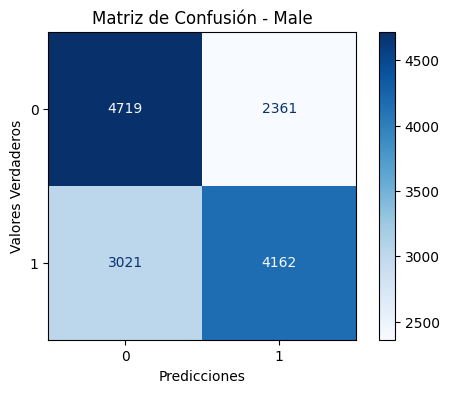

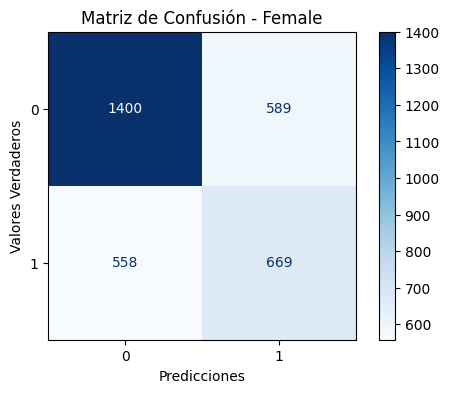

In [ ]:
# Matriz de confusión por género
for sex in dataframe['sex'].unique():
    grupo = dataframe[dataframe['sex'] == sex]
    true_labels = grupo['is_recid']
    pred_labels = grupo['decile_score']
    display_confusion_matrix(sex, true_labels, pred_labels)

## Categoría de Edad

Las matrices de confusión según la categoría de edad nos permiten apreciar las siguientes características:

* Greater than 45: se advierte un cierto sesgo a la hora de predecir inadecuadamente a los mayores de 45 como no reincidentes cuando sí que vuelven a cometer crímenes, de hecho hay más delincuentes que volvieron a cometer crímenes etiquetados como no reincidentes que como sí reincidentes.

* 25 - 45: al igual que en el caso anterior se etiqueta erróneamente a una gran cantidad de reincidentes como personas que no volverían a delinquir, sin embargo esta vez se presenta un mucho mayor número de aciertos a la hora de etiquetarlos correctamente como reincidentes.

* Less than 25: para este grupo de edad se etiquetan la inmensa mayoría de manera correcta como reincidentes, sin embargo los demás valores de error presentan una cantidad bastante alta de instancias, por lo que no se puede afirmar que el modelo tenga un gran éxito con este rango de edad.

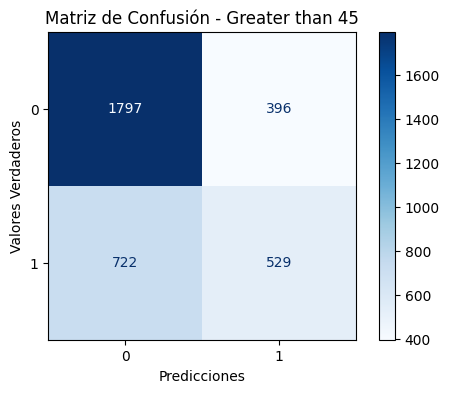

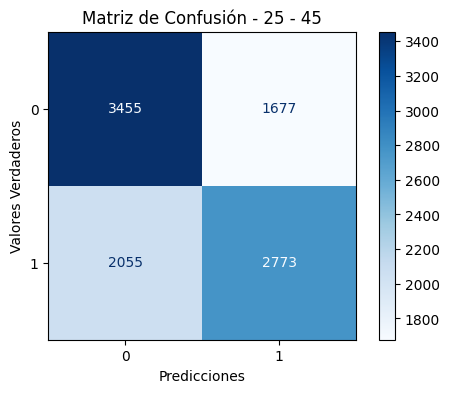

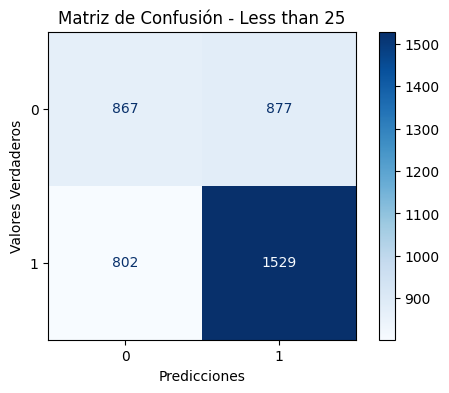

In [ ]:
# Matriz de confusión por género
for age_cat in dataframe['age_cat'].unique():
    grupo = dataframe[dataframe['age_cat'] == age_cat]
    true_labels = grupo['is_recid']
    pred_labels = grupo['decile_score']
    display_confusion_matrix(age_cat, true_labels, pred_labels)

# Conclusión

En el presente trabajo se ha realizado un estudio completo sobre la presencia de sesgos en el modelo COMPASS, en primer lugar se ha llevado a cabo un estudio de la estructura y contenido del dataframe ofrecido para evaluarlo, una vez familiarizados con el conjunto de datos el siguiente paso fue poner énfasis en las variables personales que pueden provocar la aparición de sesgos en el modelo, tras ello se emplearon diversas métricas de evaluación con el propósito de encontrar dichas inclinaciones, para finalmente realizar un impacto de las mismas en las predicciones emitidas por el modelo.

Por último, con base en los resultados obtenidos solo queda añadir cuales serían las recomendaciones que el modelo COMPASS debería seguir para reducir o eliminar los sesgos advertidos:

* Ingesta y preprocesamiento: lo primero que el equipo de desarrollo debería acometer sería segurarse de que los datos utilizados sean representativos y no contengan sesgos inherentes, puesto que a la hora de eliminar sesgos siempre es mucho más efectivo prevenir que curar. Para ello sería necesario revisar el proceso de recopilación de datos y utilizar técnicas de balanceo entre clases como el sobremuestreo de clases minoritarias o el submuestreo de clases mayoritarias para asegurarse de que el modelo no esté sesgado hacia una clase particular.

* Entrenamiento: se deben emplear algoritmos con foco en minimizar el sesgo, como la reponderación de las instancias de entrenamiento o el uso de modelos de equidad (fairness-aware models), continuando con esta propuesta sería útil el uso de técnicas de regularización que penalicen el sesgo en el modelo o técnicas de ensamble que combinen diversos modelos para reducir el sesgo individual que puede provenir de cada uno.

* Evaluación: en un algoritmo de esta importancia es imprescindible llevar a cabo evaluaciones continuas desglosadas por subgrupos (como raza, género, edad) para identificar y cuantificar sesgos, para ello se pueden utilizar matrices de confusión por subgrupos como las empleadas en el punto anterior.

* Reentrenamiento: incluso una vez publicada la primera versión del modelo en producción, sería recomendable que cuando pasase el tiempo se reentrenase con nuevas muestras de datos y con la información de muestras corregidas en base a las predicciones emitidas anteriormente.

* Transparencia: por el tipo de datos y la importancia de las decisiones que hay un juego resulta totalmente necesario mantener una documentación detallada del proceso que se ha seguido (decisiones de diseño, fases de entrenamiento,  resultados de evaluaciones anteriores, etc), puesto que todo esto permitirá que las autoridades correspondientes y los futuros desarrolladores que participen en el proyecto puedan realizar un mejor trabajo de seguimiento.

Finalmente con todas estas recomendaciones es posible desarrollar un mejor modelo, menos sesgados y que sea capaz de preservar la asunción de inocencia independientemente de la raza, género, edad y cualquier aspecto social o biológico del acusado.